<a href="https://colab.research.google.com/github/pawljmlo/covid-ur-wasting/blob/main/%20plot-charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

## import data

In [6]:
path_overlapping = "/content/drive/MyDrive/projekty/review-ai-covid-ur/data/covid-data-extracted-overlapping-edited.csv"

In [7]:
df = pd.read_csv(path_overlapping).drop(['Unnamed: 0'], axis=1)

In [8]:
df.head()

,Reference ID,ID in the review,Primary study Bibtex ID,Num,Per one,New,Reference,Medium,What,Link,Was ver. reported?,Date reported,Versions,Ver. Used,Month,Day,Published?,Pub-link,Journal,Conference,Other,Av-Month,Av-Day,Av-Year,Retracted,How many datasets were used?,Total CTs,C-19 CTs,Total X-Rays,C-19 X-rays,Total other,C-19 other,Viral pneumonia (non-COVID),Bacterial pneumonia,Unknown pneumonia,Unclear,Asymptomatic controls,Control patients,C-19 patients,Total patients,Architecture name,Architecture modification,Accuracy,AUC,F1,Precision,NPV,Sensitivity,Specifity,Balanced Accuracy,Other metrics,Post processing,Sens. and Spec.,Both scans,"Sens., Spec., Both",CT,X-ray,Other.1
0,chen2020review,15,abbas2020classification,1.0,6.0,NaN,"Asmaa A., Mohammed M. A., Mohamed M. G.:Classi...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"3, N",0,0,196,106,0,0,1.0,0.0,0.0,1,0,NR,NR,NR,AlexNet,NR,9512,9415,NR,NR,NR,NR,NR,NR,NR,NR,0,1,0.0,#DZIEL/0!,"0,540816326530612",#DZIEL/0!
1,islam2020review,91,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, “...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,1.0,3,1,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, COVID-19 X-ray image database, Japanese Soc...",0,0,196,105,0,0,0.0,0.0,0.0,"1, sars",1,NR,NR,NR,DeTraC-ResNet18,2\3,9512,NR,NR,9336,NR,9791,9187,NR,NR,NR,2,1,1.0,#DZIEL/0!,"0,535714285714286",#DZIEL/0!
2,nguyen2020artificial,46,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, “...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"3, N",NR,NR,NR,NR,0,0,0.0,0.0,0.0,1,0,NR,NR,NR,"ResNet18, DeTraC",NR,9512,NR,NR,NR,NR,9791,9187,NR,NR,NR,2,0,0.0,#VALUE!,#VALUE!,#DZIEL/0!
3,shoeibi2020automated,77,abbas2020classification,NaN,NaN,NaN,"Asmaa A., Mohammed M. A., Mohamed M. G.:Classi...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, N",0,0,NR,NR,0,0,1.0,0.0,0.0,0,1,NR,NR,NR,DeTraC (ResNet18),2,9512,NR,NR,NR,NR,9791,9187,NR,NR,"1, Composition Phase",2,0,0.0,#DZIEL/0!,#VALUE!,#DZIEL/0!
4,ulhaq2020computer,64->63,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, ‘...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, Japanese Society of Radiological Technology...",0,0,NR,NR,0,0,0.0,0.0,0.0,0,1,NR,NR,NR,"ResNet, ImageNet",NR,9512,NR,NR,9336,NR,9791,9187,NR,NR,NR,2,0,0.0,#DZIEL/0!,#VALUE!,#DZIEL/0!


## select proper data and edit it

In [9]:
df.columns

Index(['Reference ID', 'ID in the review', 'Primary study Bibtex ID', 'Num',
       'Per one', 'New', 'Reference', 'Medium', 'What', 'Link',
       'Was ver. reported?', 'Date reported', 'Versions', 'Ver. Used', 'Month',
       'Day', 'Published?', 'Pub-link', 'Journal', 'Conference', 'Other',
       'Av-Month', 'Av-Day', 'Av-Year', 'Retracted',
       'How many datasets were used?', 'Total CTs', 'C-19 CTs', 'Total X-Rays',
       'C-19 X-rays', 'Total other', 'C-19 other',
       'Viral pneumonia (non-COVID)', 'Bacterial pneumonia',
       'Unknown pneumonia', 'Unclear', 'Asymptomatic controls',
       'Control patients', 'C-19 patients', 'Total patients',
       'Architecture name', 'Architecture modification', 'Accuracy', 'AUC',
       'F1', 'Precision', 'NPV', 'Sensitivity', 'Specifity',
       'Balanced Accuracy', 'Other metrics', 'Post processing',
       'Sens. and Spec.', 'Both scans', 'Sens., Spec., Both', 'CT', 'X-ray',
       'Other.1'],
      dtype='object')

In [10]:
interesting_columns = ['Primary study Bibtex ID', 'Reference ID', 'Month', 'Day',
                       'Total CTs', 'C-19 CTs', 'Total X-Rays', 'C-19 X-rays', 'Total other', 'C-19 other', 
                       'Control patients', 'C-19 patients', 'Total patients', 
                       'Accuracy', 'AUC', 'F1', 'Precision', 'NPV', 'Sensitivity', 'Specifity', 'Balanced Accuracy', 'Other metrics']

In [11]:
df = df[interesting_columns]
df.head()

,Primary study Bibtex ID,Reference ID,Month,Day,Total CTs,C-19 CTs,Total X-Rays,C-19 X-rays,Total other,C-19 other,Control patients,C-19 patients,Total patients,Accuracy,AUC,F1,Precision,NPV,Sensitivity,Specifity,Balanced Accuracy,Other metrics
0,abbas2020classification,chen2020review,3,26,0,0,196,106,0,0,NR,NR,NR,9512,9415,NR,NR,NR,NR,NR,NR,NR
1,abbas2020classification,islam2020review,3,26,0,0,196,105,0,0,NR,NR,NR,9512,NR,NR,9336,NR,9791,9187,NR,NR
2,abbas2020classification,nguyen2020artificial,3,26,NR,NR,NR,NR,0,0,NR,NR,NR,9512,NR,NR,NR,NR,9791,9187,NR,NR
3,abbas2020classification,shoeibi2020automated,3,26,0,0,NR,NR,0,0,NR,NR,NR,9512,NR,NR,NR,NR,9791,9187,NR,NR
4,abbas2020classification,ulhaq2020computer,3,26,0,0,NR,NR,0,0,NR,NR,NR,9512,NR,NR,9336,NR,9791,9187,NR,NR


In [12]:
df['Year'] = '2020'
df['Day'] = df['Day'].replace('NR', 1) # approximation

In [13]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df.drop(['Year', 'Month', 'Day'], axis=1)

In [14]:
df = df.replace('NR', np.nan)

In [15]:
id_multiple_models = []

for id, group in df.groupby('Primary study Bibtex ID'):

  if not (group.shape[0] == len(group['Reference ID'].unique())):
    id_multiple_models.append(id)

In [16]:
df = df[~df['Primary study Bibtex ID'].isin(id_multiple_models)]
df.head()

,Primary study Bibtex ID,Reference ID,Total CTs,C-19 CTs,Total X-Rays,C-19 X-rays,Total other,C-19 other,Control patients,C-19 patients,Total patients,Accuracy,AUC,F1,Precision,NPV,Sensitivity,Specifity,Balanced Accuracy,Other metrics,Date
0,abbas2020classification,chen2020review,0,0,196,106,0,0,NaN,NaN,NaN,9512,9415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-26
1,abbas2020classification,islam2020review,0,0,196,105,0,0,NaN,NaN,NaN,9512,NaN,NaN,9336,NaN,9791,9187,NaN,NaN,2020-03-26
2,abbas2020classification,nguyen2020artificial,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,9512,NaN,NaN,NaN,NaN,9791,9187,NaN,NaN,2020-03-26
3,abbas2020classification,shoeibi2020automated,0,0,NaN,NaN,0,0,NaN,NaN,NaN,9512,NaN,NaN,NaN,NaN,9791,9187,NaN,NaN,2020-03-26
4,abbas2020classification,ulhaq2020computer,0,0,NaN,NaN,0,0,NaN,NaN,NaN,9512,NaN,NaN,9336,NaN,9791,9187,NaN,NaN,2020-03-26


In [17]:
df[['Other metrics - value', 'Other metrics - name']] = df['Other metrics'].str.split(", ", expand=True).drop(2, axis=1)
df = df.drop('Other metrics', axis=1)
df.head()

,Primary study Bibtex ID,Reference ID,Total CTs,C-19 CTs,Total X-Rays,C-19 X-rays,Total other,C-19 other,Control patients,C-19 patients,Total patients,Accuracy,AUC,F1,Precision,NPV,Sensitivity,Specifity,Balanced Accuracy,Date,Other metrics - value,Other metrics - name
0,abbas2020classification,chen2020review,0,0,196,106,0,0,NaN,NaN,NaN,9512,9415,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-26,NaN,NaN
1,abbas2020classification,islam2020review,0,0,196,105,0,0,NaN,NaN,NaN,9512,NaN,NaN,9336,NaN,9791,9187,NaN,2020-03-26,NaN,NaN
2,abbas2020classification,nguyen2020artificial,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,9512,NaN,NaN,NaN,NaN,9791,9187,NaN,2020-03-26,NaN,NaN
3,abbas2020classification,shoeibi2020automated,0,0,NaN,NaN,0,0,NaN,NaN,NaN,9512,NaN,NaN,NaN,NaN,9791,9187,NaN,2020-03-26,NaN,NaN
4,abbas2020classification,ulhaq2020computer,0,0,NaN,NaN,0,0,NaN,NaN,NaN,9512,NaN,NaN,9336,NaN,9791,9187,NaN,2020-03-26,NaN,NaN


In [18]:
df['C INDEX'] = df[df['Other metrics - name'] == 'C INDEX']['Other metrics - value']
df = df.drop(['Other metrics - value', 'Other metrics - name'], axis=1)

In [19]:
columns_to_num = ['Total CTs', 'C-19 CTs', 'Total X-Rays', 'C-19 X-rays', 'Total other', 'C-19 other', 
                  'Control patients', 'C-19 patients', 'Total patients', 
                  'Accuracy', 'AUC', 'F1', 'Precision', 'NPV', 'Sensitivity', 'Specifity', 'Balanced Accuracy', 'C INDEX']

columns_metrics = ['Accuracy', 'AUC', 'F1', 'Precision', 'NPV', 'Sensitivity', 'Specifity', 'Balanced Accuracy', 'C INDEX']

In [20]:
df[columns_to_num] = df[columns_to_num].astype(float)

In [21]:
df[columns_metrics] = df[columns_metrics] / 100

In [22]:
df_mean = df.groupby('Primary study Bibtex ID').mean()
df_mean.head()

,Total CTs,C-19 CTs,Total X-Rays,C-19 X-rays,Total other,C-19 other,Control patients,C-19 patients,Total patients,Accuracy,AUC,F1,Precision,NPV,Sensitivity,Specifity,Balanced Accuracy,C INDEX
Primary study Bibtex ID,,,,,,,,,,,,,,,,,,
abbas2020classification,0.0,0.0,196.0,105.5,0.0,0.0,NaN,NaN,196.0,95.12,94.15,NaN,93.36,NaN,97.928,91.896,NaN,94.0
acar2020improving,3132.0,1331.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,99.80,99.99,99.8,99.80,NaN,99.800,NaN,NaN,NaN
al2020fast,0.0,0.0,1310.0,326.0,0.0,0.0,NaN,NaN,NaN,97.40,NaN,NaN,NaN,NaN,85.150,99.060,NaN,NaN
alom2020covid_mtnet,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,98.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alqudah2019covid,0.0,0.0,71.0,48.0,0.0,0.0,NaN,NaN,NaN,95.20,NaN,NaN,100.00,NaN,93.300,100.000,NaN,NaN


In [23]:
df_mean['Date'] = df[['Primary study Bibtex ID','Date']].groupby('Primary study Bibtex ID').min()
df_mean.head()

,Total CTs,C-19 CTs,Total X-Rays,C-19 X-rays,Total other,C-19 other,Control patients,C-19 patients,Total patients,Accuracy,AUC,F1,Precision,NPV,Sensitivity,Specifity,Balanced Accuracy,C INDEX,Date
Primary study Bibtex ID,,,,,,,,,,,,,,,,,,,
abbas2020classification,0.0,0.0,196.0,105.5,0.0,0.0,NaN,NaN,196.0,95.12,94.15,NaN,93.36,NaN,97.928,91.896,NaN,94.0,2020-03-26
acar2020improving,3132.0,1331.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,99.80,99.99,99.8,99.80,NaN,99.800,NaN,NaN,NaN,2020-06-14
al2020fast,0.0,0.0,1310.0,326.0,0.0,0.0,NaN,NaN,NaN,97.40,NaN,NaN,NaN,NaN,85.150,99.060,NaN,NaN,2020-06-19
alom2020covid_mtnet,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,98.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-07
alqudah2019covid,0.0,0.0,71.0,48.0,0.0,0.0,NaN,NaN,NaN,95.20,NaN,NaN,100.00,NaN,93.300,100.000,NaN,NaN,2020-03-01


## describe the data

In [24]:
df.groupby('Primary study Bibtex ID').describe()

Total CTs                       ... C INDEX                  
                            count    mean  std     min  ...     25%   50%   75%   max
Primary study Bibtex ID                                 ...                          
abbas2020classification       4.0     0.0  0.0     0.0  ...    94.0  94.0  94.0  94.0
acar2020improving             1.0  3132.0  NaN  3132.0  ...     NaN   NaN   NaN   NaN
al2020fast                    1.0     0.0  NaN     0.0  ...     NaN   NaN   NaN   NaN
alom2020covid_mtnet           0.0     NaN  NaN     NaN  ...     NaN   NaN   NaN   NaN
alqudah2019covid              1.0     0.0  NaN     0.0  ...     NaN   NaN   NaN   NaN
...                           ...     ...  ...     ...  ...     ...   ...   ...   ...
zhong2020using                1.0     0.0  NaN     0.0  ...     NaN   NaN   NaN   NaN
zhou2020automatic             1.0   473.0  NaN   473.0  ...     NaN   NaN   NaN   NaN
zhou2020improved              0.0     NaN  NaN     NaN  ...    92.0  92.0  92.0  92.0
zhou2020soda                  1.0     0.0  NaN     0.0  ...     NaN   NaN   NaN   NaN
zokaeinikoo2020aidcov         0.0     NaN  NaN     NaN  ...     NaN   NaN   NaN   NaN

[138 rows x 144 columns]

In [25]:
df.groupby('Primary study Bibtex ID').describe().describe()

Total CTs                 ...    C INDEX           
            count           mean  ...        75%        max
count  138.000000     108.000000  ...  19.000000  19.000000
mean     1.471014    3570.298765  ...  94.452632  94.452632
std      1.630870   16877.362188  ...   4.349121   4.349121
min      0.000000       0.000000  ...  81.000000  81.000000
25%      1.000000       0.000000  ...  93.000000  93.000000
50%      1.000000       0.000000  ...  95.000000  95.000000
75%      2.000000     747.000000  ...  97.500000  97.500000
max     11.000000  132583.000000  ...  99.600000  99.600000

[8 rows x 144 columns]

## visualisation - preparation

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [27]:
df_mean.head(10)

,Total CTs,C-19 CTs,Total X-Rays,C-19 X-rays,Total other,C-19 other,Control patients,C-19 patients,Total patients,Accuracy,AUC,F1,Precision,NPV,Sensitivity,Specifity,Balanced Accuracy,C INDEX,Date
Primary study Bibtex ID,,,,,,,,,,,,,,,,,,,
abbas2020classification,0.0,0.0,196.0,105.5,0.0,0.0,NaN,NaN,196.0,95.120000,94.15,NaN,93.36,NaN,97.928000,91.896000,NaN,94.0,2020-03-26
acar2020improving,3132.0,1331.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,99.800000,99.99,99.8,99.80,NaN,99.800000,NaN,NaN,NaN,2020-06-14
al2020fast,0.0,0.0,1310.0,326.0,0.0,0.0,NaN,NaN,NaN,97.400000,NaN,NaN,NaN,NaN,85.150000,99.060000,NaN,NaN,2020-06-19
alom2020covid_mtnet,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,98.780000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-07
alqudah2019covid,0.0,0.0,71.0,48.0,0.0,0.0,NaN,NaN,NaN,95.200000,NaN,NaN,100.00,NaN,93.300000,100.000000,NaN,NaN,2020-03-01
amyar2020multi,1044.0,449.0,0.0,0.0,0.0,0.0,595.0,449.0,1044.0,86.000000,93.00,78.5,NaN,NaN,94.000000,79.000000,NaN,NaN,2020-04-21
angelov2020explainable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.00,NaN,89.000000,NaN,NaN,89.0,2020-04-29
apostolopoulos2020extracting,0.0,0.0,3234.5,455.0,0.0,0.0,NaN,NaN,NaN,99.180000,NaN,NaN,NaN,NaN,97.360000,99.420000,NaN,NaN,2020-04-01
ardakani2020application,1020.0,510.0,0.0,0.0,0.0,0.0,86.0,108.0,194.0,99.346667,99.40,NaN,99.15,100.0,99.346667,99.346667,NaN,NaN,2020-04-30


In [28]:
df_mean.describe()

,Total CTs,C-19 CTs,Total X-Rays,C-19 X-rays,Total other,C-19 other,Control patients,C-19 patients,Total patients,Accuracy,AUC,F1,Precision,NPV,Sensitivity,Specifity,Balanced Accuracy,C INDEX
count,108.000000,106.000000,118.000000,116.000000,129.000000,128.000000,51.000000,61.000000,71.000000,107.000000,52.000000,51.000000,54.000000,7.000000,94.000000,67.000000,1.0,19.000000
mean,3570.298765,1379.445597,7400.073588,148.658046,48.736434,1.804688,2352.469281,362.303123,2737.705835,93.611355,94.281306,90.348235,92.848025,93.167143,92.125652,90.388124,66.0,94.452632
std,16877.362188,7370.318711,33687.734838,434.574324,536.082164,20.417708,5041.004316,539.062958,5904.051413,5.891104,7.960494,8.861815,8.789652,12.122198,6.939614,11.055489,NaN,4.349121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,33.000000,45.000000,71.920000,62.600000,64.000000,54.000000,66.000000,68.910000,28.000000,66.0,81.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,203.500000,99.000000,225.000000,91.470000,94.000000,85.000000,90.382500,95.680000,87.662500,86.500000,66.0,93.000000
50%,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,486.000000,151.000000,641.000000,95.300000,96.225000,93.500000,95.565000,97.000000,94.000000,93.000000,66.0,95.000000
75%,747.000000,349.750000,1295.250000,181.500000,0.000000,0.000000,1117.000000,383.333333,1490.666667,97.950000,99.130000,97.055000,98.765000,98.905000,97.875000,97.460000,66.0,97.500000
max,132583.000000,65806.000000,339271.000000,4273.000000,6087.000000,231.000000,23664.000000,3389.000000,32717.000000,100.000000,99.990000,100.000000,100.000000,100.000000,100.000000,100.000000,66.0,99.600000


In [32]:
df_mean = df_mean.sort_values('Date')

In [86]:
df_mean['Date'] = df_mean['Date'].astype('string').str[5:]

In [174]:
def plot_chart(df, pos_first, pos_second, metric_name, total_name, c19_name, fill_total, fill_c19, color, include_empty=False):

  if include_empty:
    df = df[(~df[metric_name].isna())]
  else:
    df = df[(~df[metric_name].isna()) & (df[total_name]) & (df[c19_name])]

  sns.scatterplot(ax=axes[pos_first, pos_second], x=df['Date'], y=df[metric_name], size=df[total_name].fillna(fill_total), hue=df[c19_name].fillna(fill_c19), 
                palette=color, sizes=list(np.geomspace(20, 1500, len(df[total_name].unique()))), hue_norm=LogNorm(200, 2000), legend=False)
  
  axes[pos_first, pos_second].set_ylabel(metric_name + ' [%]', fontsize=20)
  for y in axes[pos_first, pos_second].get_yticklabels():
      y.set_fontsize(15)
  

  axes[pos_first, pos_second].set_xlabel('Date', fontsize=20)
  axes[pos_first, pos_second].xaxis.set_visible(True)
  print()
  for x in axes[pos_first, pos_second].get_xticklabels():
    
      x.set_rotation(90)
      x.set_fontsize(15)

  step = int((len(axes[pos_first, pos_second].get_xticklabels()))/10) - 1
  if step < 1:
    step = 1

  loc = plticker.MultipleLocator(base=step) # this locator puts ticks at regular intervals
  axes[pos_first, pos_second].xaxis.set_major_locator(loc)

## visualisation - charts

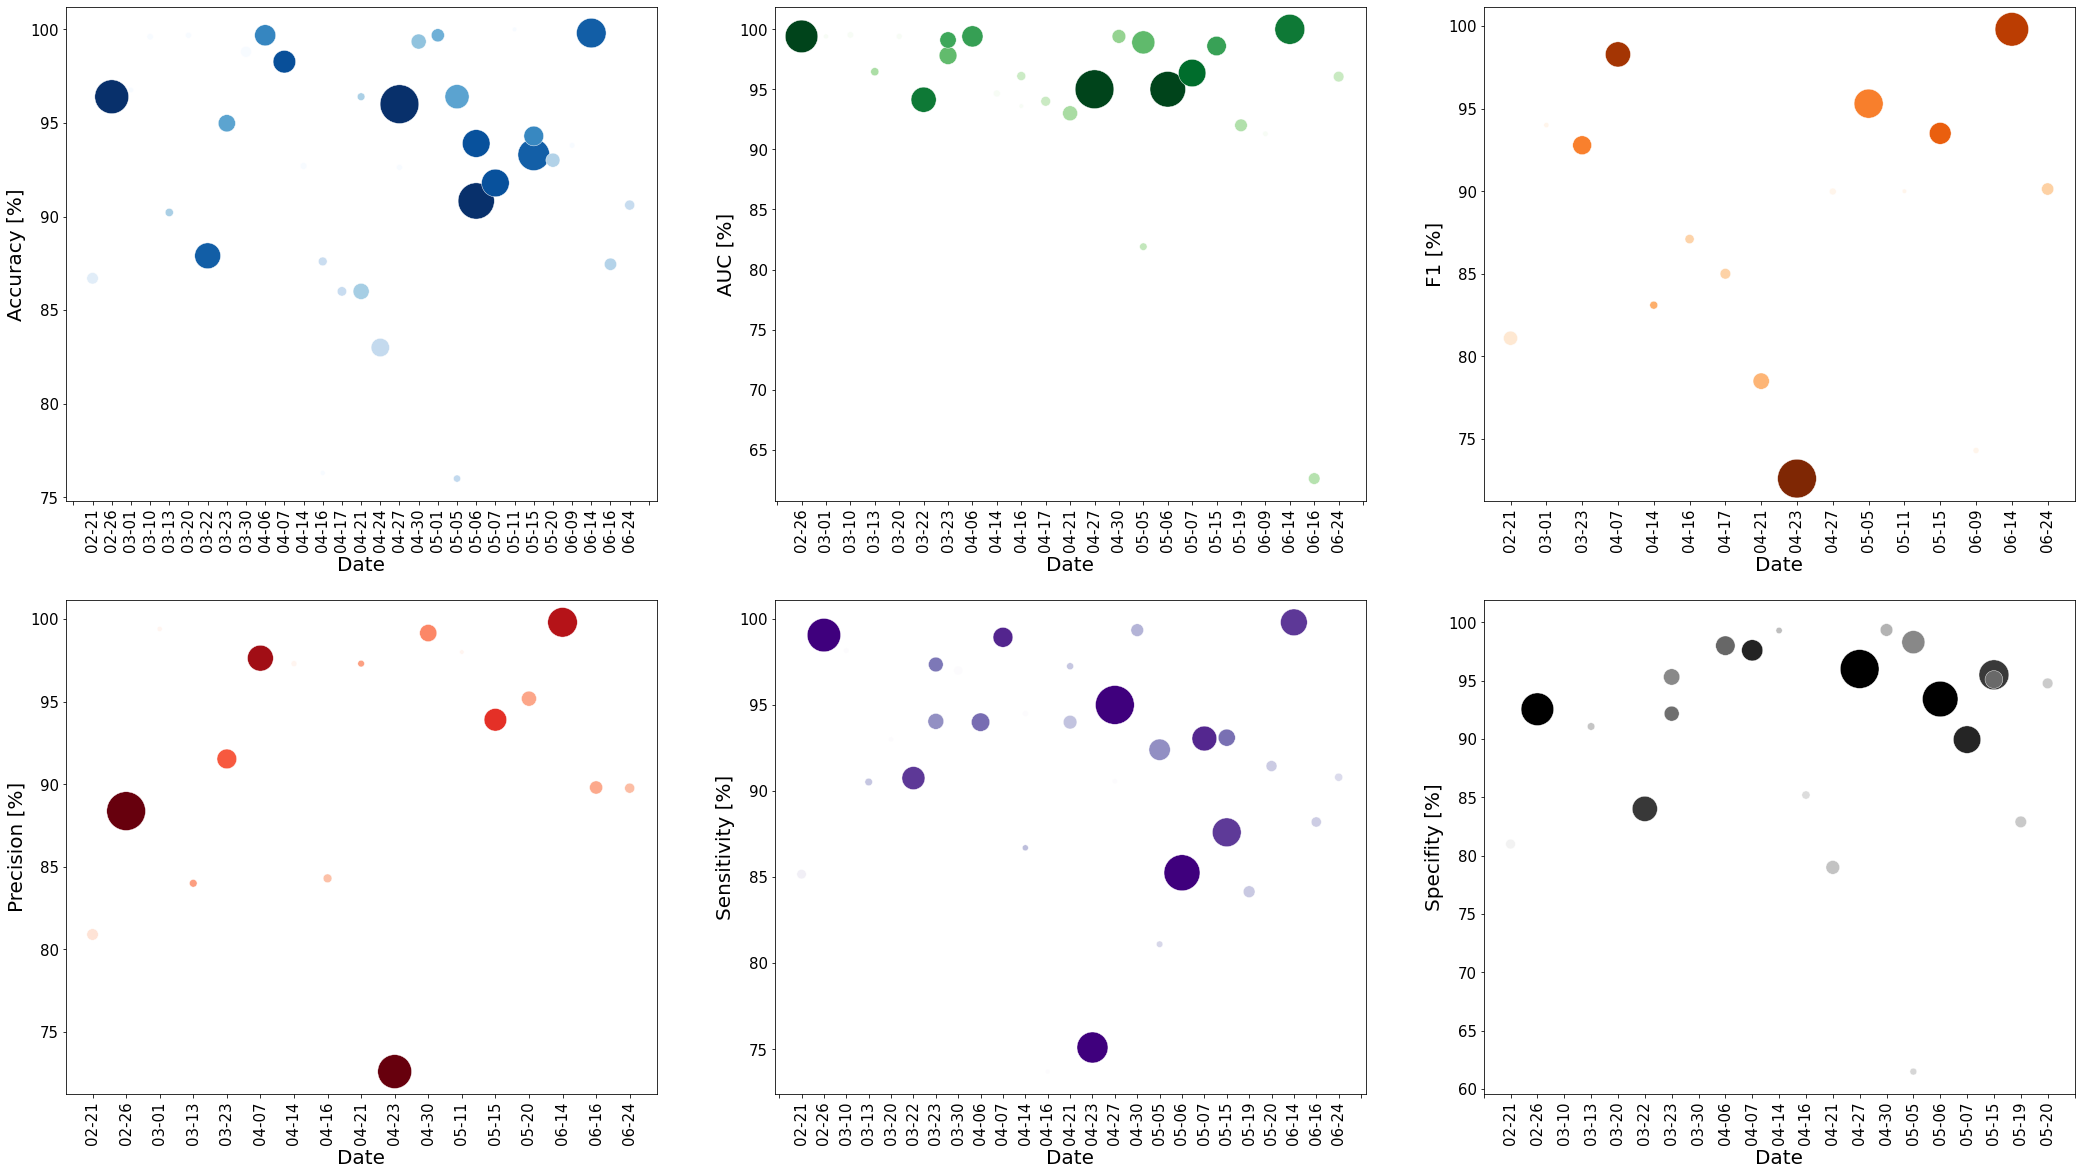

In [163]:
total_name = 'Total CTs'
c19_name = 'C-19 CTs'
include_empty = False

fig, axes = plt.subplots(2, 3, figsize=(36, 20))
plot_chart(df_mean, 0, 0, 'Accuracy', total_name, c19_name, 0, 5, 'Blues', include_empty)
plot_chart(df_mean, 0, 1, 'AUC', total_name, c19_name, 0, 5, 'Greens', include_empty)
plot_chart(df_mean, 0, 2, 'F1', total_name, c19_name, 0, 5, 'Oranges', include_empty)
plot_chart(df_mean, 1, 0, 'Precision', total_name, c19_name, 0, 5, 'Reds', include_empty)
plot_chart(df_mean, 1, 1, 'Sensitivity', total_name, c19_name, 0, 5, 'Purples', include_empty)
plot_chart(df_mean, 1, 2, 'Specifity', total_name, c19_name, 0, 5, 'Greys', include_empty)

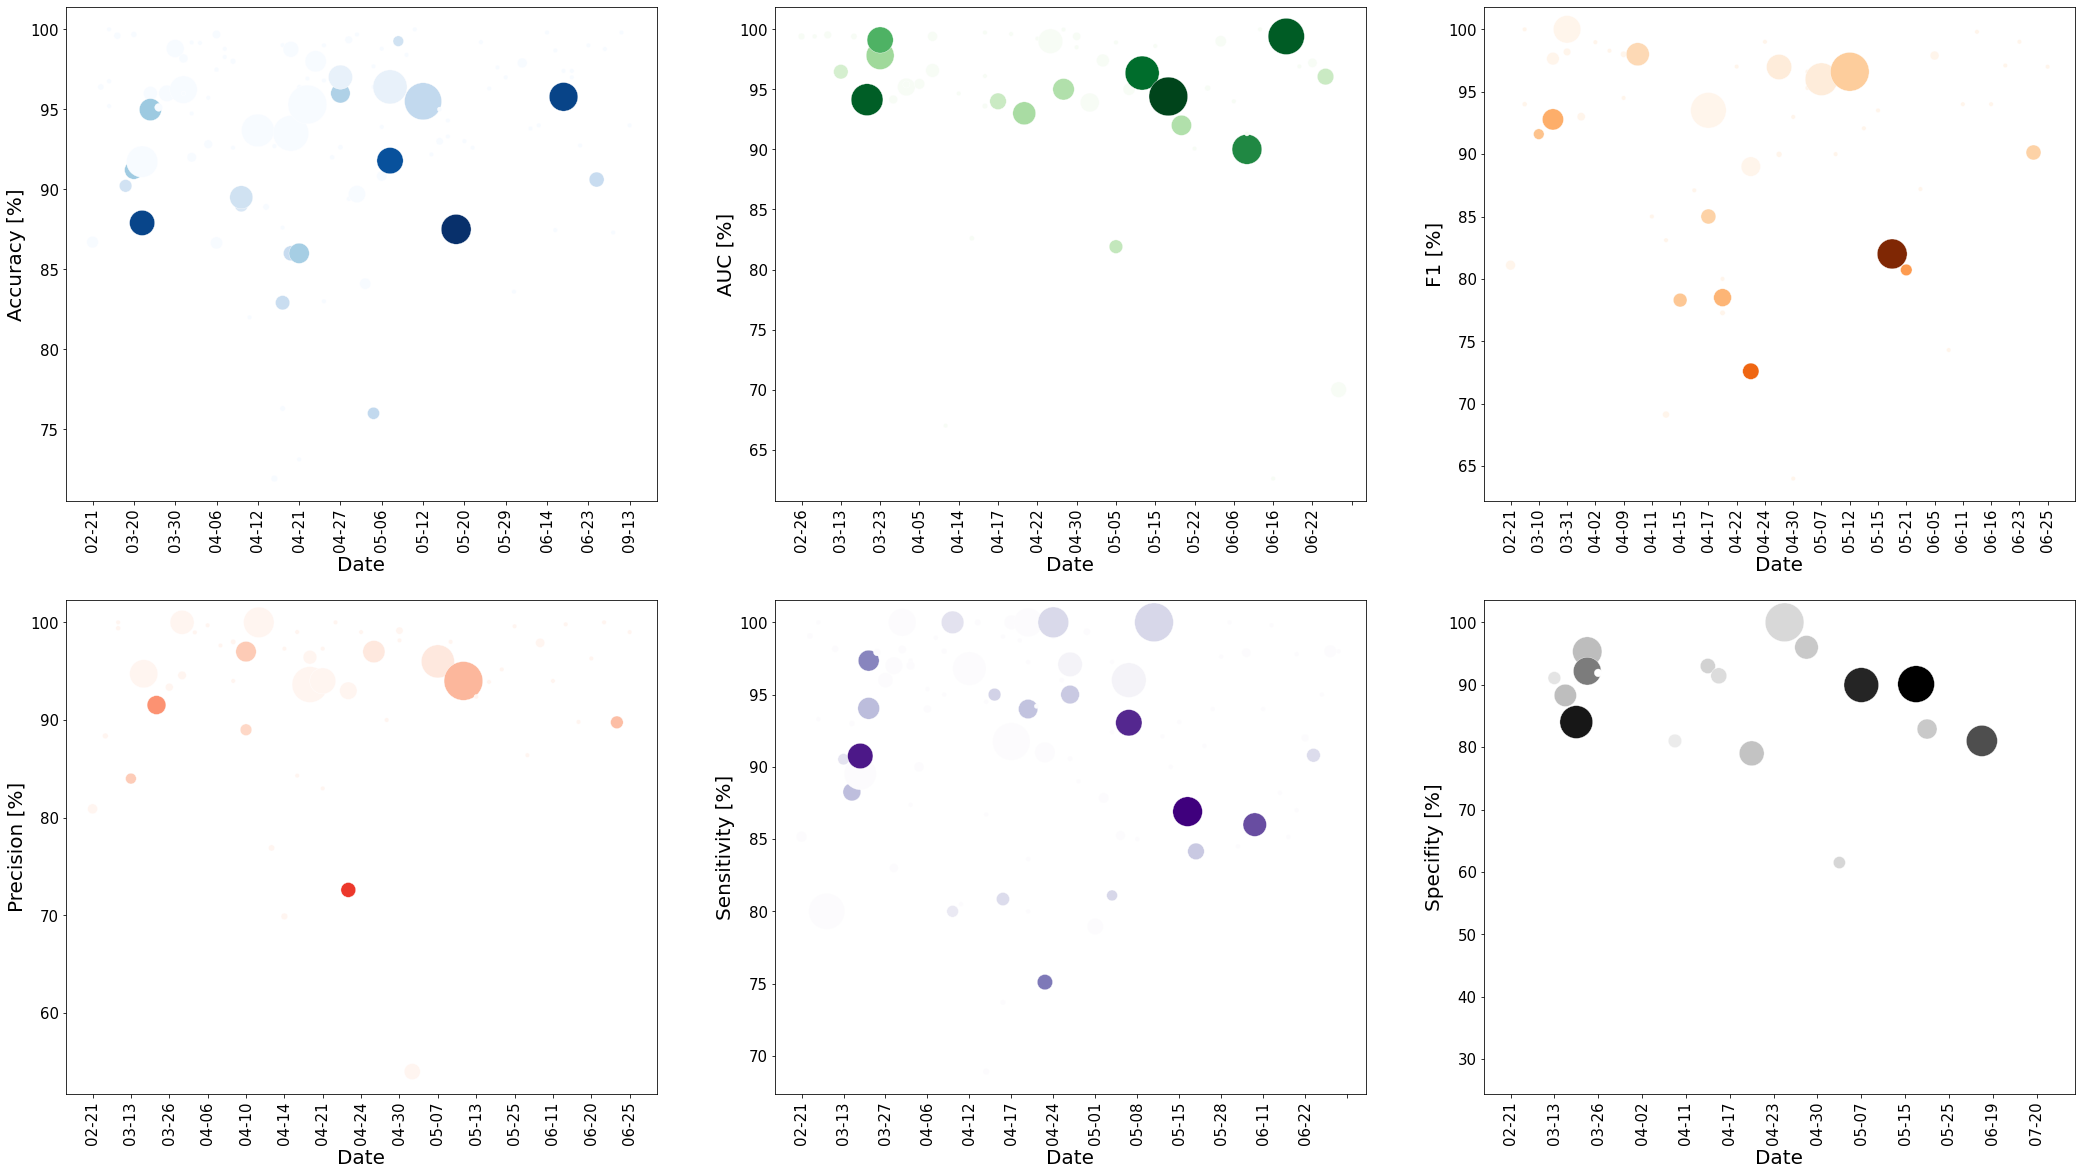

In [164]:
total_name = 'Total patients'
c19_name = 'C-19 patients'
include_empty = True

fig, axes = plt.subplots(2, 3, figsize=(36, 20))
plot_chart(df_mean, 0, 0, 'Accuracy', total_name, c19_name, 0, 5, 'Blues', include_empty)
plot_chart(df_mean, 0, 1, 'AUC', total_name, c19_name, 0, 5, 'Greens', include_empty)
plot_chart(df_mean, 0, 2, 'F1', total_name, c19_name, 0, 5, 'Oranges', include_empty)
plot_chart(df_mean, 1, 0, 'Precision', total_name, c19_name, 0, 5, 'Reds', include_empty)
plot_chart(df_mean, 1, 1, 'Sensitivity', total_name, c19_name, 0, 5, 'Purples', include_empty)
plot_chart(df_mean, 1, 2, 'Specifity', total_name, c19_name, 0, 5, 'Greys', include_empty)

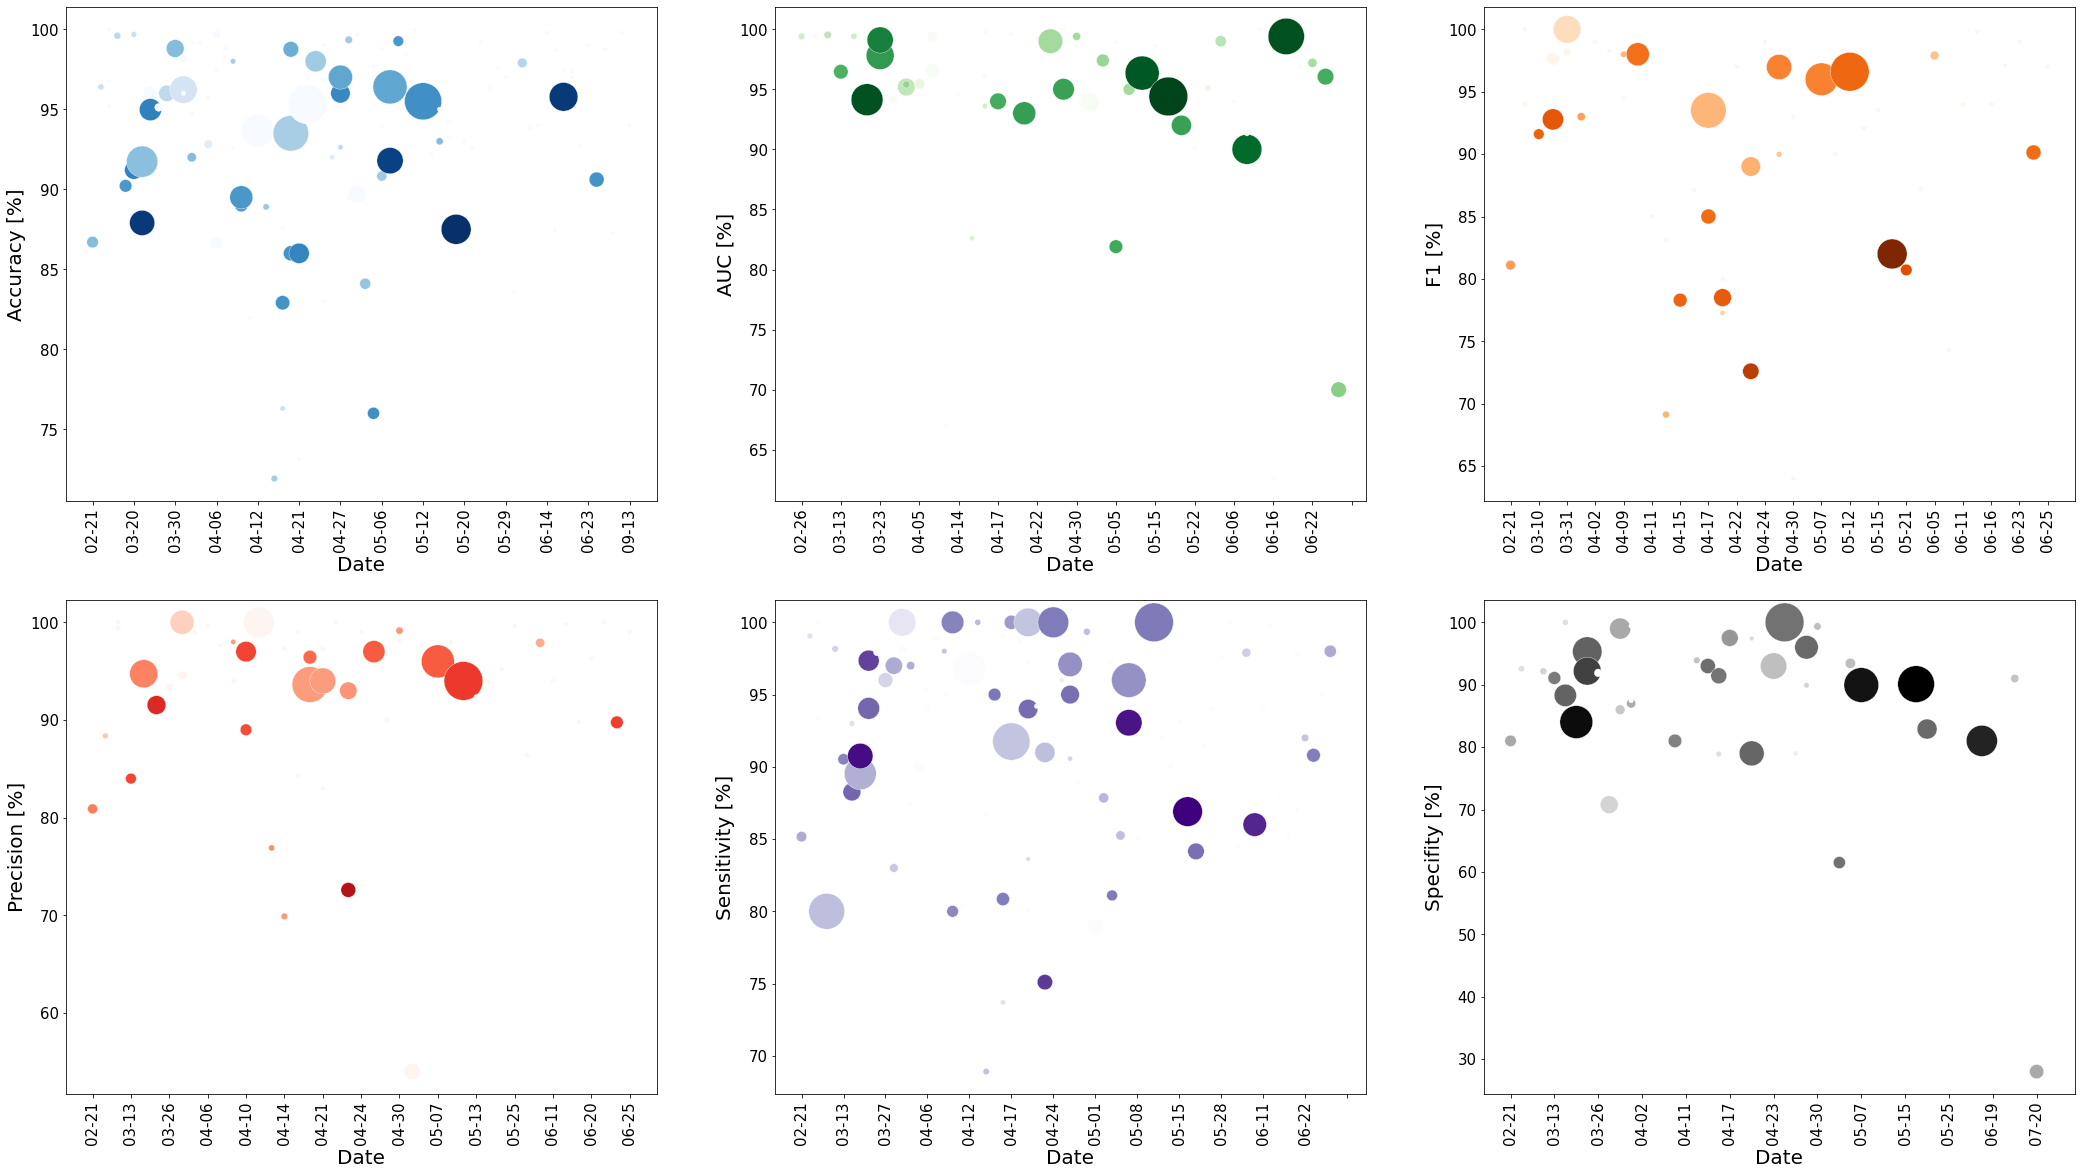

In [173]:
total_name = 'Total patients'
c19_name = 'C-19 patients'
include_empty = True

fig, axes = plt.subplots(2, 3, figsize=(36, 20))
plot_chart(df_mean, 0, 0, 'Accuracy', total_name, c19_name, 0, 5, 'Blues', include_empty)
plot_chart(df_mean, 0, 1, 'AUC', total_name, c19_name, 0, 5, 'Greens', include_empty)
plot_chart(df_mean, 0, 2, 'F1', total_name, c19_name, 0, 5, 'Oranges', include_empty)
plot_chart(df_mean, 1, 0, 'Precision', total_name, c19_name, 0, 5, 'Reds', include_empty)
plot_chart(df_mean, 1, 1, 'Sensitivity', total_name, c19_name, 0, 5, 'Purples', include_empty)
plot_chart(df_mean, 1, 2, 'Specifity', total_name, c19_name, 0, 5, 'Greys', include_empty)